##                                           Social Media Analytics Assignment 1

##                                                       Group 80

##                                               Twitter Sentiment Analysis

In [ ]:

### Group Members Name with Student ID:#
from IPython.display import display, HTML
html_content = """

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

    <style>
        .table {
            display: table;
            width: 70%;
            border-collapse: collapse;
        }
        .table-row {
            display: table-row;
        }
        .table-cell {
            display: table-cell;
            border: 1px solid #dddddd;
            padding: 8px;
        }
        .header {
            background-color: #fffff;
            font-weight: bold;
            font-size: 100%;
        }
    </style>
</head>
<body>
 <h3>Group Members Name with Student ID:</h3>

<div class="table" style="float: left">

    <div class="table-row header">
        <div class="table-cell">BITS ID</div>
        <div class="table-cell">Name</div>
        <div class="table-cell">BITS ID</div>
        <div class="table-cell">Email ID</div>
        <div class="table-cell">Contribution</div>
    </div>
    <div class="table-row">
        <div class="table-cell">1.</div>
        <div class="table-cell">Beesetti Hema Shiridi Sai Kumari</div>
        <div class="table-cell">2023AA05794</div>
        <div class="table-cell">2023AA05794@wilp.bits-pilani.ac.in</div>
        <div class="table-cell">100%</div>
    </div>
    <div class="table-row">
        <div class="table-cell">2.</div>
        <div class="table-cell">GANESHKUMAR KARUPPAIAH</div>
        <div class="table-cell">2023aa05600</div>
        <div class="table-cell">2023aa05600@wilp.bits-pilani.ac.in</div>
        <div class="table-cell">100%</div>
    </div>
    <div class="table-row">
    <div class="table-cell">3.</div>
        <div class="table-cell">KOLLURI VENKATESWARA SWAROOP</div>
        <div class="table-cell">2023aa05945</div>
        <div class="table-cell">2023aa05945@wilp.bits-pilani.ac.in</div>
        <div class="table-cell">100%</div>
    </div>
    <div class="table-row">
    <div class="table-cell">4.</div>
        <div class="table-cell">RAJESH J</div>
        <div class="table-cell">2023aa05859</div>
        <div class="table-cell">2023aa05859@wilp.bits-pilani.ac.in</div>
        <div class="table-cell">100%</div>
    </div>
    <div class="table-row">
    <div class="table-cell">5.</div>
        <div class="table-cell">VIJAYA LAKSHMI R</div>
        <div class="table-cell">2023aa05341</div>
        <div class="table-cell">2023aa05341@wilp.bits-pilani.ac.in</div>
        <div class="table-cell">100%</div>
    </div>
</div>
</html>
"""
display(HTML(html_content))

## Problem Statement:

Perform sentiment analysis on a dataset of Twitter tweets. The dataset includes tweets, user information, and corresponding sentiment labels (positive, negative, or neutral). The objective is to analyze the sentiments expressed in tweets, develop a sentiment classifier, and gain insights into public opinions on Twitter. Use one Dataset from files for this exercise.

TASK 1

## Data Preparation (2 Marks):
    
    - Load the Twitter dataset, including tweets and corresponding sentiment labels.

    - Preprocess the text data, including tasks such as tokenization, lowercasing, and removal of stop words and special characters.

In [ ]:
import pandas as pd

# Load the training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the dataset
print(train_data.head())
print(test_data.head())


   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [ ]:
import re

def preprocess_with_regex(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    tokens = text.split()  # Tokenize
    return ' '.join(tokens)

# Apply to the train dataset
train_data['cleaned_text'] = train_data['tweet'].apply(preprocess_with_regex)
train_data[['tweet', 'cleaned_text']].head()

# Apply to the test dataset
test_data['cleaned_text'] = test_data['tweet'].apply(preprocess_with_regex)
test_data[['tweet', 'cleaned_text']].head()


,tweet,cleaned_text
0,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ne...
2,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal heal...
3,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday to my amazing hilarious nephew eli a...


TASK 2

## Exploratory Data Analysis (2 Marks):

    - Analyze the distribution of sentiment labels in the dataset.

    - Explore the most frequent words associated with each sentiment class.

    - Visualize sentiment distribution over time (if timestamp information is available).

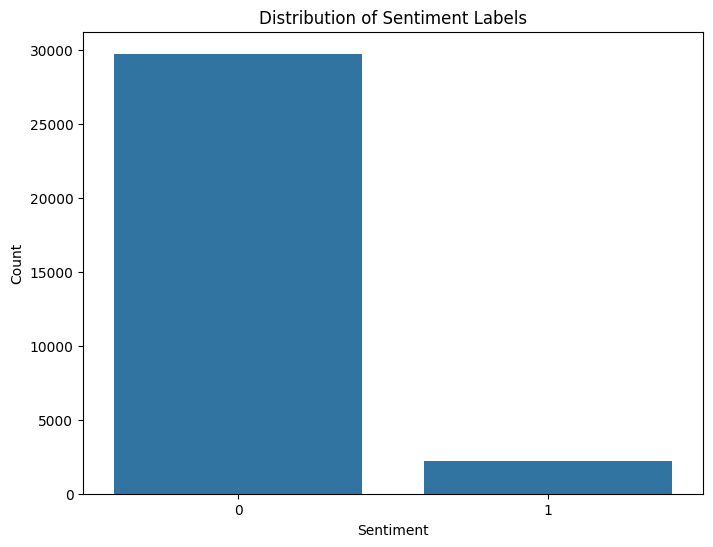

In [ ]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# 1. Analyze the distribution of sentiment labels in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


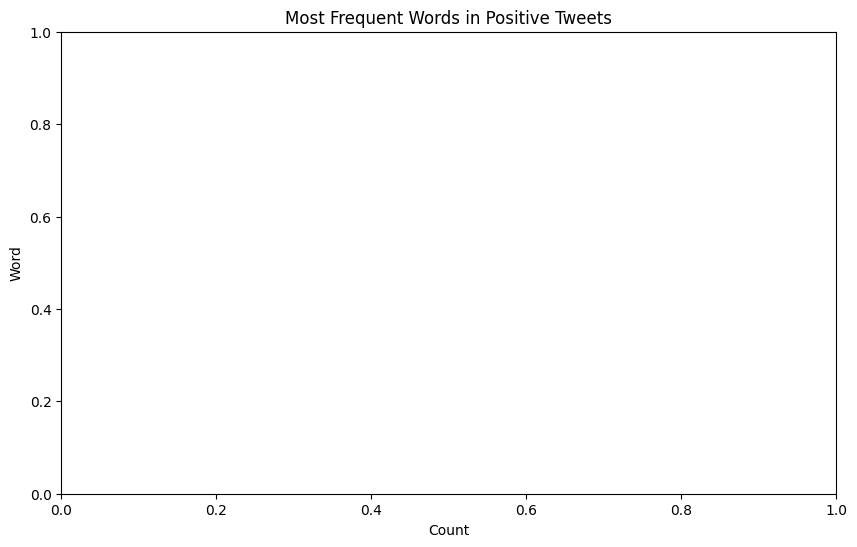

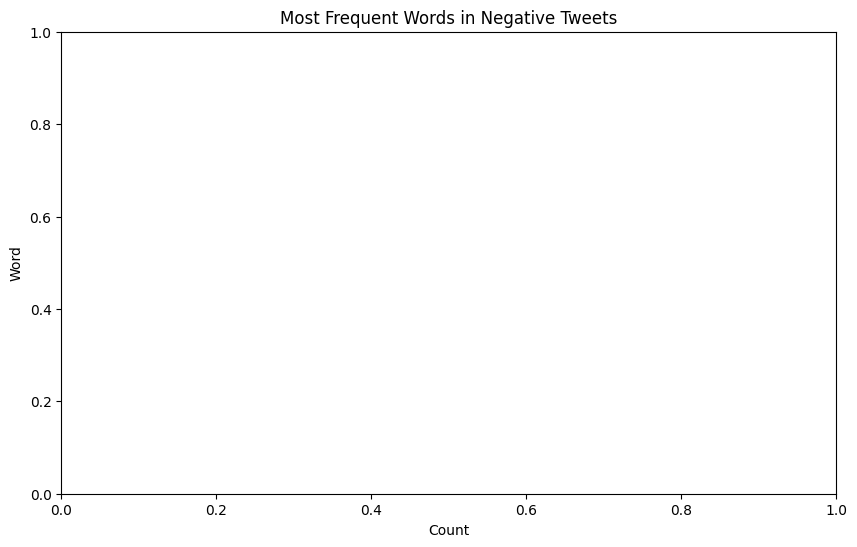

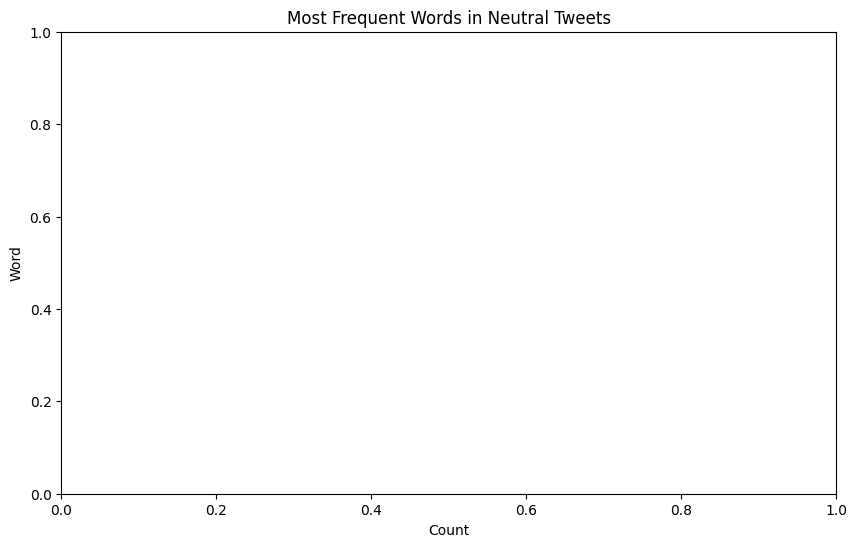

In [ ]:

# 2. Explore the most frequent words associated with each sentiment class
def plot_most_frequent_words(data, label, title):
    words = ' '.join(data[data['label'] == label]['cleaned_text']).split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    df_common_words = pd.DataFrame(common_words, columns=['word', 'count'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', data=df_common_words)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

plot_most_frequent_words(train_data, 'positive', 'Most Frequent Words in Positive Tweets')
plot_most_frequent_words(train_data, 'negative', 'Most Frequent Words in Negative Tweets')
plot_most_frequent_words(train_data, 'neutral', 'Most Frequent Words in Neutral Tweets')


In [ ]:

# 3. Visualize sentiment distribution over time (if timestamp information is available)
if 'timestamp' in train_data.columns:
    train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
    train_data.set_index('timestamp', inplace=True)

    plt.figure(figsize=(12, 6))
    train_data['label'].resample('M').value_counts().unstack().plot()
    plt.title('Sentiment Distribution Over Time')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.show()
else:
    print("Timestamp information is not available in the dataset.")

Timestamp information is not available in the dataset.


TASK 3
## Feature Extraction (2 Marks):

    - Utilize appropriate feature extraction techniques such as TF-IDF or word embeddings.

    - Split the dataset into training and testing sets.

In [ ]:
# Feature Extraction
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Utilize TF-IDF for feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_data['cleaned_text'])

# Labels
y = train_data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Feature extraction and dataset splitting completed.")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Feature extraction and dataset splitting completed.
Training set size: (25569, 5000)
Testing set size: (6393, 5000)


TASK 4
## Model Tuning ( 2 Marks)

    - Train a machine learning algorithm (e.g., Naive Bayes, Support Vector Machine) or a deep learning model (e.g., LSTM, BERT).

In [ ]:
# Model Tuning SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.86      0.46      0.60       456

    accuracy                           0.96      6393
   macro avg       0.91      0.73      0.79      6393
weighted avg       0.95      0.96      0.95      6393

Accuracy Score:
0.9562020960425466


In [22]:
# pip install tensorflow

In [24]:
# Model Tuning LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


# Preprocess the text data for the model
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train_data['cleaned_text'])
X_train = tokenizer.texts_to_sequences(train_data['cleaned_text'])
X_test = tokenizer.texts_to_sequences(test_data['cleaned_text'])

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['label'])
y_train = to_categorical(y_train, num_classes=3)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Since test_data does not have labels, we cannot evaluate the model on test_data
# Instead, we will use a validation set from train_data for evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1)

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Evaluate the model
print("Classification Report:")
# print(classification_report(y_val_classes, y_val_pred_classes, target_names=list(label_encoder.classes_)))
print(classification_report(y_val_classes, y_val_pred_classes, target_names=label_encoder.classes_.astype(str)))
print("Accuracy Score:")
print(accuracy_score(y_val_classes, y_val_pred_classes))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 102s 240ms/step - accuracy: 0.9209 - loss: 0.2984 - val_accuracy: 0.9503 - val_loss: 0.1392
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 137s 228ms/step - accuracy: 0.9618 - loss: 0.1056 - val_accuracy: 0.9557 - val_loss: 0.1297
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 142s 228ms/step - accuracy: 0.9727 - loss: 0.0798 - val_accuracy: 0.9578 - val_loss: 0.1230
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 142s 229ms/step - accuracy: 0.9783 - loss: 0.0636 - val_accuracy: 0.9581 - val_loss: 0.1275
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 142s 228ms/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9579 - val_loss: 0.1377
538/538 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step
Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 95s 238ms/step - accuracy: 0.9806 - loss: 0.0600 - val_accuracy: 0.9812 - val_loss: 0.0575
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 90s 224ms/step - accuracy: 0.9867 - loss: 0.0406 - val_accuracy: 0.9778 - val_loss: 0.0662
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 94s

Comments:

TASK 5
## Model Evaluation ( 2 Marks):

    - Evaluate the model's performance using accuracy, precision, recall, and F1 score metrics.

## Report Summary:
# Precision:
The precision for each class indicates the proportion of true positive predictions among all positive predictions for that class. A precision of 0.98 for class 0 means that 98% of the tweets predicted as class 0 are actually class 0.

# Recall:
The recall for each class indicates the proportion of true positive predictions among all actual positive instances for that class. A recall of 0.98 for class 0 means that 98% of the actual class 0 tweets are correctly predicted as class 0.

# F1-Score:
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. An F1-score of 0.98 for class 0 indicates a high balance between precision and recall.

# Support:
The support for each class indicates the number of actual instances of that class in the dataset. There are 5937 instances of class 0 in the dataset.

# Weighted Average:
 The weighted average metrics (precision, recall, and F1-score) take into account the support (number of instances) for each class, providing an overall performance measure for the model. A weighted average F1-score of 0.97 indicates that the model performs well across all classes.

# Accuracy Score:
 The accuracy score of 0.9695 indicates that approximately 96.95% of the predictions made by the model are correct.
## Overall,
The model demonstrates high performance with precision, recall, and F1-scores close to 1.0, and an accuracy score of 96.95%. This suggests that the model is effective at classifying the sentiment of tweets.
